**Experimentos para artigo:**

**"Identificação de Relações Temporais em Português com Abordagem Baseada em Regras"**

Dárcio Santos Rocha  
Mestrado em Ciências da Computação  
Universidade Federal da Bahia  

## REGRAS

In [1]:
from parse.ParseTimebankPT import TimebankPT, RelacaoTemporal

#Ordem por acurácia das regras aplicadas individualmente - alto custo computacional
sort_rules_accuracy     = [271, 92, 112, 98, 108, 183, 199, 197, 99, 9, 171, 100, 137, 115, 90, 97, 278, 198, 187, 39, 139, 196, 138, 140, 202, 111, 89, 201, 172, 150, 141, 237, 107, 110, 189, 31, 24, 166, 34, 101, 33]

#[código, tipo de relação, ordem de execução, expressão lógica que representa a regra]
#ORD COM NÚM NEGATIVO TORNA A REGRA INATIVA
rules = [
    [271,    "OVERLAP",     1, "self.f.is_dependencyType(tokenE, tokenT, 'nsubj') and self.f.followedBy(tokenT, tokenE)"],
    [237,    "AFTER",       3, "self.f.is_dependencyType(tokenE, tokenT, 'advcl')"],
    [183,    "AFTER",       4, "( self.f.tenseVerb(tokenE, 'Past') or self.f.morph(tokenE, ('VerbForm', 'Part')) )  and ( self.f.hasWordInContextPrecede(tokenE, ['anterior'], 10) or self.f.hasWordInContextFollow(tokenE, ['anterior'], 10) )"],
    [166,    "OVERLAP",     5, "self.f.verbGerundio(tokenE) and self.f.dep(tokenE, 'advcl') and self.f.dep(tokenT, ['obl', 'nmod'])"],
    [115,    "OVERLAP",     6, "self.f.tenseVerb(tokenE, 'Fut') and self.f.hasWordInBetween(tokenE, tokenT, 'para') and self.f.hasNoVerbInBetween(tokenE, tokenT)"], 
    [108,    "OVERLAP",     7, "self.f.search(['começar'], tokenE)"],  
    [101,    "OVERLAP",     8, "self.f.hasWordInContextPrecede(tokenE, ['quando', 'em que'])"],   
    [98,     "OVERLAP",     9, "self.f.search(['começou', 'começado', 'iniciou', 'iniciado'], tokenE) and self.f.closelyFollowing(tokenE, tokenT)"],
    [97,     "OVERLAP",    10, "self.f.hasWordInContextPrecede(tokenT, ['iniciar', 'começar'], lemma=True) and (self.f.hasWordInContextPrecede(tokenE, ['através', 'pelo'], lemma=True) or self.f.hasWordInContextPrecede(tokenE, ['de', 'do', 'da', 'até', 'à', 'durante']))"],  
    [92,     "BEFORE",     11, "self.f.hasWordInContextPrecede(tokenE, 'então')"],  
    [24,     "OVERLAP",    12, "self.f.morph(tokenE, ('VerbForm', 'Inf')) and self.f.pos(tokenT, 'Noun') and self.f.hasWordInContextFollow(tokenE, tokenT.text)"],  
    [9,      "OVERLAP",    13, "self.f.search(['hoje', 'atualmente'], tokenT, lemma = True) and self.f.tenseVerb(tokenE, 'PAST') and self.f.closelyFollowing(tokenE, tokenT)"],
    [150,    "OVERLAP",    15, "self.f.followedBy(tokenT, ['para','a'], 5) and self.f.followedBy(tokenT, tokenE, 10)"],
    [278,    "OVERLAP",    22, "self.f.is_dependencyType(tokenE, tokenT, 'amod') and self.f.tipo(tokenT, ['DATE', 'TIME']) and self.f.morph(tokenE, ('Tense', '')) and self.f.classe(tokenE, ['OCCURRENCE', 'STATE'])"],
    [189,    "OVERLAP",    24, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['OCCURRENCE']) and self.f.closelyFollowing(tokenE, tokenT, 15)"],  
    [107,    "OVERLAP",    25, "self.f.classe(tokenE, ['OCCURRENCE']) and self.f.hasDepInContextPrecede(tokenT, 'cc', 5) and self.f.tipo(tokenT, ['DURATION'])"], 
    [90,     "AFTER",      26, "self.f.search('ontem', tokenT.text) and self.f.tenseVerb(tokenE, 'Fut')"],
    [39,     "OVERLAP",    27, "( self.f.hasWordInContextFollow(tokenE, 'antes') or self.f.hasWordInContextPrecede(tokenT, 'antes') ) and not self.f.tenseVerb(tokenE, 'Fut') and self.f.hasNoVerbInBetween(tokenE, tokenT)"], 
    [202,    "OVERLAP",    28, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['OCCURRENCE']) and self.f.hasNoVerbInBetween(tokenE, tokenT)"],
    [201,    "OVERLAP",    29, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['OCCURRENCE']) and ( self.f.followedBy(tokenE, tokenT, 5) or self.f.followedBy(tokenT, tokenE, 5) )"], 
    [199,    "OVERLAP",    30, "self.f.classe(tokenE, ['REPORTING']) and self.f.tipo(tokenT, ['DURATION']) and self.f.hasWordInContextPrecede(tokenT, ['no', 'em'])"],   
    [197,    "OVERLAP",    31, "self.f.tipo(tokenT, ['TIME']) and self.f.classe(tokenE, ['STATE']) and ( self.f.precededBy(tokenT, tokenE, 2) or self.f.followedBy(tokenT, tokenE, 2) )"],
    [137,    "OVERLAP",    32, "self.f.tipo(tokenT, ['TIME']) and self.f.precededBy(tokenT, 'str', ['em', 'no', 'na']) and self.f.hasNoVerbInBetween(tokenE, tokenT) and self.f.closelyFollowing(tokenE, tokenT, 10)"],    
    [171,    "OVERLAP",    33, "self.f.tipo(tokenT, ['DATE']) and self.f.classe(tokenE, ['STATE']) and self.f.search(['agora', 'atualmente'], tokenT.text) and self.f.precededBy(tokenT, 'token', tokenE)"],    
    [141,    "OVERLAP",    34, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['OCCURRENCE']) and self.f.hasWordInContextFollow(tokenT, tokenE.text, 10)"],    
    [139,    "OVERLAP",    35, "self.f.tipo(tokenT, ['DURATION']) and self.f.hasWordInBetween(tokenE, tokenT, ['durante', 'para']) and self.f.hasNoVerbInBetween(tokenE, tokenT)"],   
    [138,    "OVERLAP",    36, "self.f.classe(tokenE, ['STATE']) and self.f.tipo(tokenT, ['DATE']) and self.f.hasWordInBetween(tokenE, tokenT, ['em', 'no', 'na']) and self.f.closelyFollowing(tokenE, tokenT, 20) and self.f.pos(tokenE, ['verb', 'noun']) and not self.f.dep(tokenE, ['obl', 'nummod'])"],  
    [112,    "BEFORE",     37, "self.f.hasWordInContextPrecede(tokenT, 'até') and self.f.tenseVerb(tokenE, 'PAST')"],    
    [99,     "AFTER",      38, "self.f.tenseVerb(tokenE, 'Pres') and self.f.tipo(tokenT, ['DATE']) and self.f.hasWordInContextPrecede(tokenT, 'desde')"],    
    [100,    "AFTER",      39, "self.f.tipo(tokenT, ['DURATION']) and self.f.hasWordInContextFollow(tokenT, ['depois', 'após']) and self.f.tenseVerb(tokenE, 'Past')"],
    [196,    "OVERLAP",    40, "self.f.classe(tokenE, ['STATE']) and self.f.tipo(tokenT, ['DURATION']) and self.f.closelyFollowing(tokenE, tokenT, 20) and self.f.pos(tokenE, ['verb', 'noun'])"],
    [140,    "OVERLAP",    41, "self.f.classe(tokenE, ['OCCURRENCE']) and self.f.hasWordInContextFollow(tokenT, tokenE.text) and not self.f.dep(tokenE, ['obl', 'obl:agent', 'acl', 'acl:relcl', 'conj'])"],  
    [172,    "OVERLAP",    42, "self.f.classe(tokenE, ['STATE']) and self.f.closelyFollowing(tokenE, tokenT, 20) and self.f.pos(tokenE, ['NOUN', 'VERB']) "],  
    [111,    "OVERLAP",    43, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['REPORTING']) and self.f.tenseVerb(tokenE, 'Pres')"],
    [198,    "OVERLAP",    44, "self.f.tipo(tokenT, ['DURATION']) and self.f.hasWordInContextPrecede(tokenT, ['para', 'durante']) and self.f.closelyFollowing(tokenE, tokenT)"],    
    [110,    "OVERLAP",    45, "self.f.tenseVerb(tokenE, 'Past') and self.f.tipo(tokenT, ['DATE']) and self.f.hasWordInContextPrecede(tokenT, 'durante')"],    
    [89,     "BEFORE",     46, "self.f.hasWordInContextPrecede(tokenT, 'até') and self.f.tipo(tokenT, ['DATE']) and self.f.pos(tokenE.head, ['VERB'])"],
    [34,     "AFTER",      47, "self.f.hasWordInBetween(tokenE, tokenT, 'após') and self.f.closelyFollowing(tokenE, tokenT)"],
    [33,     "AFTER",      48, "self.f.search('ontem', tokenT.text) and self.f.tenseVerb(tokenE, 'Pres')"],  
    [187,    "OVERLAP",    50, "self.f.tipo(tokenT, ['DURATION']) and ( self.f.hasWordInContextPrecede(tokenT, ['para', 'durante']) or self.f.hasWordInContextFollow(tokenE, ['para', 'durante']) ) and self.f.closelyFollowing(tokenE, tokenT)"],  
    [31,     "AFTER",      51, "self.f.tipo(tokenT, ['DATE']) and self.f.tenseVerb(tokenE, ['Past']) and self.f.hasWordInContextPrecede(tokenT, ['em'], 1) and self.f.tenseVerb(tokenE.head, ['Past'])"],    
]


# RESULTADO TREINO

In [5]:
path_tml = r'TimeBankPT\train\*.tml'
%time tb = TimebankPT(path_tml)

dev = tb.train_test(path_tml).upper()
print(dev)

rt = RelacaoTemporal(tb)
rt.rules = rules

SEQUÊNCIA PIPELINE: PORTUGUÊS
   1 -> tok2vec
   2 -> morphologizer
   3 -> parser
   4 -> attribute_ruler
   5 -> lemmatizer
   6 -> ner
   7 -> pipe_timebankpt
   8 -> merge_entities


Wall time: 22.5 s
TRAIN


### SISTEMA SEM OTIMIZAÇÃO

TRAIN
Wall time: 1min
PURO


Resultado,Erros,Acertos,Total,Extras,pct_acerto
task,,,,,
A,132,330,462,504,34.16


Resultado          Erros  Acertos  Total  Extras  pct_acerto
task relType_pred                                           
A    BEFORE           13       33     46      39       38.82
     AFTER            21       28     49      29       35.90
     OVERLAP          98      269    367     436       33.50



              precision    recall  f1-score   support

                  0.000     0.000     0.000       504
       AFTER      0.359     0.326     0.341        86
      BEFORE      0.388     0.412     0.400        80
     OVERLAP      0.335     0.928     0.492       290
       VAGUE      0.000     0.000     0.000         6

    accuracy                          0.342       966
   macro avg      0.216     0.333     0.247       966
weighted avg      0.165     0.342     0.211       966



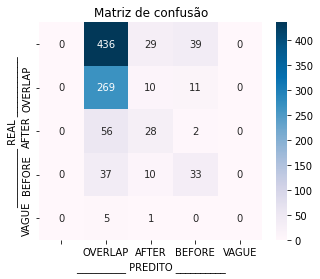

In [6]:
#PROCESSA TODAS SENTENÇAS QUE CONTEM A TASK 'A'

print(dev.upper())
rt.task = 'A'
#rt.sort_rules('codigo_regra', reverse = False)   # 'codigo_regra', 'tipo_relacao', 'ordem', 'random'
rt.sort_rules(sort_rules_accuracy)

rt.processing_type = 'peneira'  # 'peneira' OR 'votacao'
rt.active_tlink_transitive = False
rt.active_tlink_candidate  = False
rt.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
rt.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
%time rt.process_rules()

#Resumo do processamento
#rt.process_resume()
#rt.status()

print('PURO')
display(rt.df_resultado_por_task, rt.df_resultado_por_classe)
rt.cm()

### + PARES CANDIDATOS

Wall time: 1min 10s
SÓ CANDIDATE


Resultado,Erros,Acertos,Total,Extras,pct_acerto
task,,,,,
A,132,329,461,472,35.26


Resultado          Erros  Acertos  Total  Extras  pct_acerto
task relType_pred                                           
A    BEFORE           13       33     46      36       40.24
     AFTER            21       28     49      28       36.36
     OVERLAP          98      268    366     408       34.63



              precision    recall  f1-score   support

                  0.000     0.000     0.000       472
       AFTER      0.364     0.326     0.344        86
      BEFORE      0.402     0.412     0.407        80
     OVERLAP      0.346     0.927     0.504       289
       VAGUE      0.000     0.000     0.000         6

    accuracy                          0.353       933
   macro avg      0.222     0.333     0.251       933
weighted avg      0.175     0.353     0.223       933



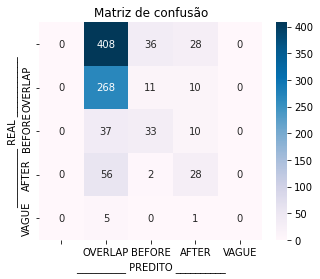

In [5]:
rt.active_tlink_transitive = False
rt.active_tlink_candidate  = True
rt.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
rt.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
%time rt.process_rules()

print('SÓ CANDIDATE')
display(rt.df_resultado_por_task, rt.df_resultado_por_classe)
rt.cm()

### + FECHAMENTO TRANSITIVO

Wall time: 1min 8s
OS DOIS


Resultado,Erros,Acertos,Total,Extras,pct_acerto
task,,,,,
A,152,343,495,523,33.69


Resultado          Erros  Acertos  Total  Extras  pct_acerto
task relType_pred                                           
A    BEFORE           13       35     48      39       40.23
     OVERLAP         112      279    391     449       33.21
     AFTER            27       29     56      35       31.87



              precision    recall  f1-score   support

                  0.000     0.000     0.000       523
       AFTER      0.319     0.302     0.310        96
      BEFORE      0.402     0.393     0.398        89
     OVERLAP      0.332     0.924     0.489       302
       VAGUE      0.000     0.000     0.000         8

    accuracy                          0.337      1018
   macro avg      0.211     0.324     0.239      1018
weighted avg      0.164     0.337     0.209      1018



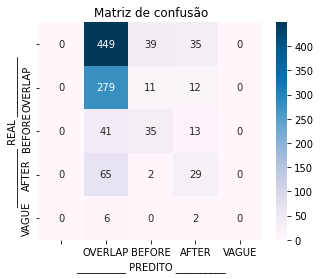

In [7]:
rt.active_tlink_transitive = True
rt.active_tlink_candidate  = True
rt.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
rt.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
%time rt.process_rules()

print('OS DOIS')
display(rt.df_resultado_por_task, rt.df_resultado_por_classe)
rt.cm()

<BR>
<BR>
<HR>

# RESULTADO TESTE

In [2]:
path_tml = r'TimeBankPT\train_test\*.tml'
%time tb = TimebankPT(path_tml)

dev = tb.train_test(path_tml).upper()
print(dev)

rt = RelacaoTemporal(tb)
rt.rules = rules

SEQUÊNCIA PIPELINE: PORTUGUÊS
   1 -> tok2vec
   2 -> morphologizer
   3 -> parser
   4 -> attribute_ruler
   5 -> lemmatizer
   6 -> ner
   7 -> pipe_timebankpt
   8 -> merge_entities


Wall time: 11.6 s
TRAIN_TEST


### SISTEMA SEM OTIMIZAÇÃO

TRAIN_TEST
Wall time: 15.8 s
PURO


Resultado,Erros,Acertos,Total,Extras,pct_acerto
task,,,,,
A,17,45,62,68,34.62


Resultado          Erros  Acertos  Total  Extras  pct_acerto
task relType_pred                                           
A    BEFORE            0        1      1       1       50.00
     OVERLAP          14       42     56      66       34.43
     AFTER             3        2      5       1       33.33



              precision    recall  f1-score   support

                  0.000     0.000     0.000        68
       AFTER      0.333     0.154     0.211        13
      BEFORE      0.500     0.200     0.286         5
     OVERLAP      0.344     0.955     0.506        44

    accuracy                          0.346       130
   macro avg      0.294     0.327     0.251       130
weighted avg      0.169     0.346     0.203       130



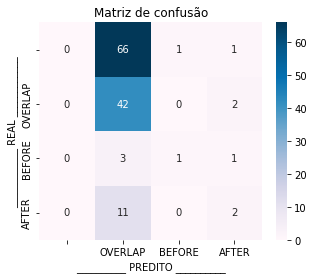

In [3]:
#PROCESSA TODAS SENTENÇAS QUE CONTEM A TASK 'A'

print(dev.upper())
rt.task = 'A'
#rt.sort_rules('codigo_regra', reverse = False)   # 'codigo_regra', 'tipo_relacao', 'ordem', 'random'
rt.sort_rules(sort_rules_accuracy)

rt.processing_type = 'peneira'  # 'peneira' OR 'votacao'
rt.active_tlink_transitive = False
rt.active_tlink_candidate  = False
rt.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
rt.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
%time rt.process_rules()

#Resumo do processamento
#rt.process_resume()
#rt.status()

print('PURO')
display(rt.df_resultado_por_task, rt.df_resultado_por_classe)
rt.cm()

### + PARES CANDIDATOS

Wall time: 7.52 s
SÓ CANDIDATE


Resultado,Erros,Acertos,Total,Extras,pct_acerto
task,,,,,
A,17,45,62,59,37.19


Resultado          Erros  Acertos  Total  Extras  pct_acerto
task relType_pred                                           
A    BEFORE            0        1      1       1       50.00
     OVERLAP          14       42     56      57       37.17
     AFTER             3        2      5       1       33.33



              precision    recall  f1-score   support

                  0.000     0.000     0.000        59
       AFTER      0.333     0.154     0.211        13
      BEFORE      0.500     0.200     0.286         5
     OVERLAP      0.372     0.955     0.535        44

    accuracy                          0.372       121
   macro avg      0.301     0.327     0.258       121
weighted avg      0.192     0.372     0.229       121



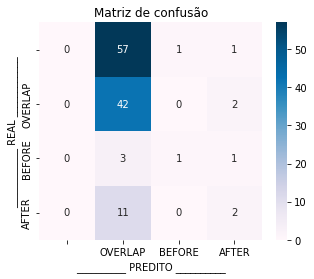

In [4]:
rt.active_tlink_transitive = False
rt.active_tlink_candidate  = True
rt.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
rt.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
%time rt.process_rules()

print('SÓ CANDIDATE')
display(rt.df_resultado_por_task, rt.df_resultado_por_classe)
rt.cm()

### + FECHAMENTO TRANSITIVO

Wall time: 6.81 s
OS DOIS


Resultado,Erros,Acertos,Total,Extras,pct_acerto
task,,,,,
A,23,48,71,60,36.64


Resultado          Erros  Acertos  Total  Extras  pct_acerto
task relType_pred                                           
A    BEFORE            0        1      1       1       50.00
     OVERLAP          19       45     64      58       36.89
     AFTER             4        2      6       1       28.57



              precision    recall  f1-score   support

                  0.000     0.000     0.000        60
       AFTER      0.286     0.118     0.167        17
      BEFORE      0.500     0.167     0.250         6
     OVERLAP      0.369     0.938     0.529        48

    accuracy                          0.366       131
   macro avg      0.289     0.305     0.237       131
weighted avg      0.195     0.366     0.227       131



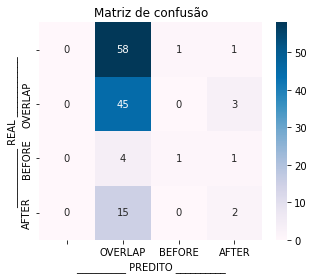

In [6]:
rt.active_tlink_transitive = True
rt.active_tlink_candidate  = True
rt.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
rt.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
%time rt.process_rules()

print('OS DOIS')
display(rt.df_resultado_por_task, rt.df_resultado_por_classe)
rt.cm()

### .